<a href="https://colab.research.google.com/github/jhildebrand22/HW-PS353/blob/main/5_49.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install whit-phys-util

     |████████████████████████████████| 10.9 MB 6.5 MB/s 


In [2]:
import whit_phys_util as buc
from sympy import *
from sympy.plotting import plot
from numpy import arcsin
from numpy import sqrt as sq
from numpy import pi as p
import pandas as pd

Mounted at /content/drive


In [3]:
repo = buc.local_repository("https://github.com/jhildebrand22/HW-PS353")

Cloning repository from GitHub.


# Problem 5.49

Find the Fourier coefficients $a_n$ and $b_n$ for a triangle wave function. compare the function to the first two terms and first six terms of the Fourier seires. Take $f_{max} = 1$ 

In [4]:
var('A tau', positive = True)
var('t')
#f = ((2*A)/pi)*asin(sin((t+.5)*(2*pi)/(tau))) + 0.5
f = Piecewise( (t + A, t < 0), (-t + A, 0<t) )
f

Piecewise((A + t, t < 0), (A - t, t > 0))

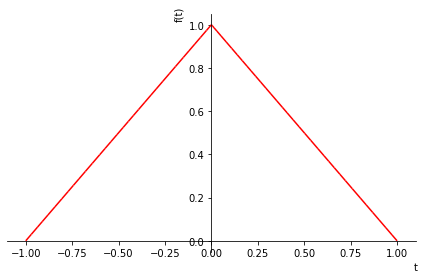

In [5]:
T = 2
params = {A: 1, tau: T}
fig1 = plot(f.subs(params), (t, -T/2, T/2),line_color="red",label="exact");

$$a_0 = \frac{1}{\tau} \int\limits_{-\tau/2}^{+\tau/2} f(t)\,dt$$

In [6]:
a0 = integrate(1/tau*f, (t, -tau/2, tau/2))
a0

A - tau/4

$$a(n) = \frac{2}{\tau} \int\limits_{-\tau/2}^{+\tau/2} f(t) \cos(n \omega t)\,dt$$

In [7]:
var('n', positive=True, integer = True)
omega = 2*pi/tau

def a(n):
  return integrate(2/tau*cos(n*omega*t)*f, (t, -tau/2, tau/2))
a(n).simplify()

tau*(1 - (-1)**n)/(pi**2*n**2)

$$b(n) = \frac{2}{\tau} \int\limits_{-\tau/2}^{+\tau/2} f(t) \sin(n \omega t)\,dt$$

In [8]:
def b(n):
  return integrate(2/tau*sin(n*omega*t)*f, (t, -tau/2, tau/2))
b(n).simplify()

0

In [9]:
def f_approx(nmax,t):
  f_sym = a0 + Sum(a(n)*cos(n*omega*t) + b(n)*sin(n*omega*t), (n, 1, nmax))
  return f_sym.doit()

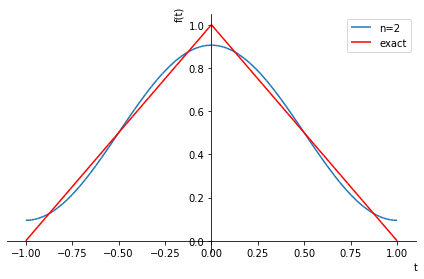

In [10]:
fig2 = plot(f_approx(2,t).subs(params), (t,-T/2,T/2), show=False, label="n=2")
fig2.legend = True
fig2.extend(fig1)
fig2.show()

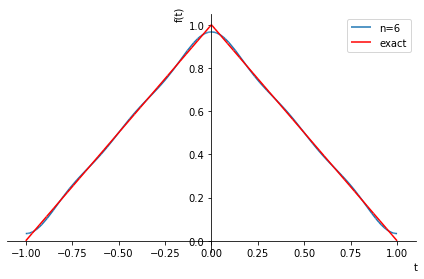

In [11]:
fig3 = plot(f_approx(6,t).subs(params), (t,-T/2,T/2), show=False, label="n=6")
fig3.legend = True
fig3.extend(fig1)
fig3.show()